In [1]:
import scanpy as sc
import scFates as scf

In [2]:
adata = sc.read("adata_tree.h5ad")

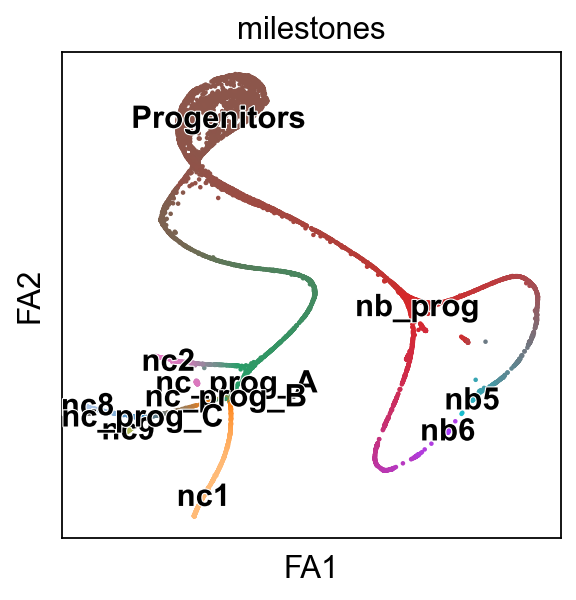

In [3]:
sc.set_figure_params()
scf.pl.milestones(adata,annotate=True)

In [4]:
root="Progenitors"
miles=["nb5","nb6"]

In [19]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only.
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 3927/3927 [00:57<00:00, 67.81it/s]
    test for upregulation for each leave vs root
    upreg nb6: 100%|██████████| 657/657 [00:01<00:00, 414.15it/s]
    finished (0:01:09) --> added 
    .uns['Progenitors->nb5<>nb6']['fork'], DataFrame with fork test results.


In [21]:
scf.tl.branch_specific(adata,root,miles,effect=.8)

    branch specific features: nb5: 51, nb6: 34
    finished --> updated 
    .uns['Progenitors->nb5<>nb6']['fork'], DataFrame updated with additionnal 'branch' column.


In [22]:
scf.tl.activation(adata,root,miles,deriv_cut=.1,n_jobs=80,n_map=100)

testing activation
    mapping: 100%|██████████| 100/100 [02:42<00:00,  1.63s/it]
    threshold pseudotime is: 5.801977241448192
    11 early and 40 late features specific to leave nb5
    9 early and 25 late features specific to leave nb6
    finished (0:02:42) --> updated 
    .uns['Progenitors->nb5<>nb6']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [23]:
sc.pp.neighbors(adata,use_rep="X_diffusion_multiscale")

/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


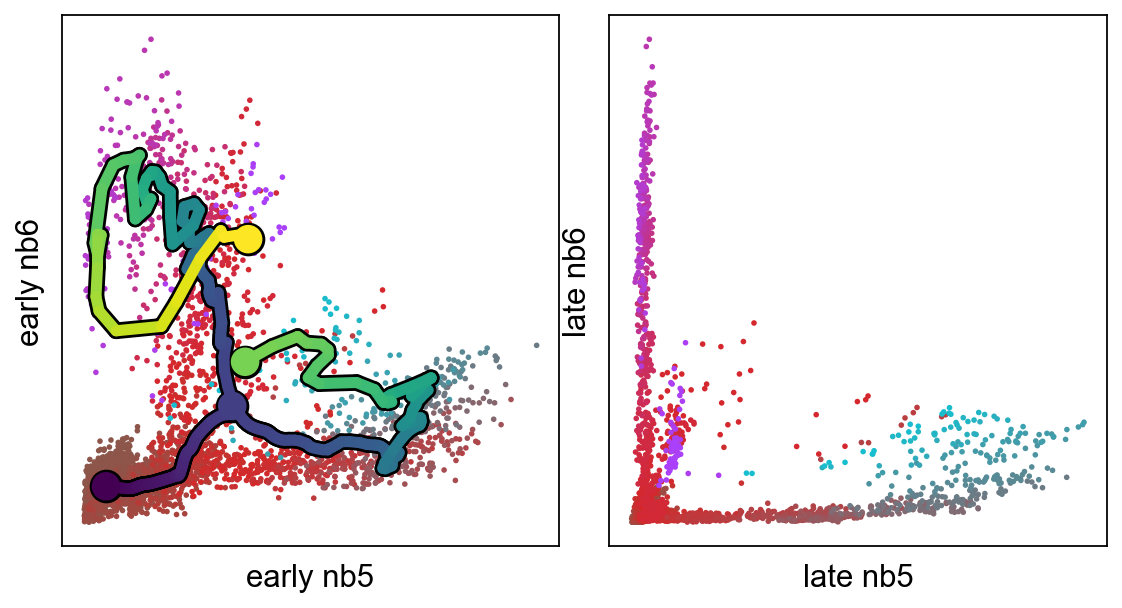

In [24]:
sc.set_figure_params()
scf.pl.modules(adata,root,miles,smooth=True,show_traj=True)

In [25]:
scf.tl.slide_cells(adata,root,miles,win=200)

--> added 
    .uns['Progenitors->nb5<>nb6']['cell_freq'], probability assignment of cells on 25 non intersecting windows.


In [26]:
scf.tl.slide_cors(adata,root,miles)

--> added 
    .uns['Progenitors->nb5<>nb6']['corAB'], gene-gene correlation modules.


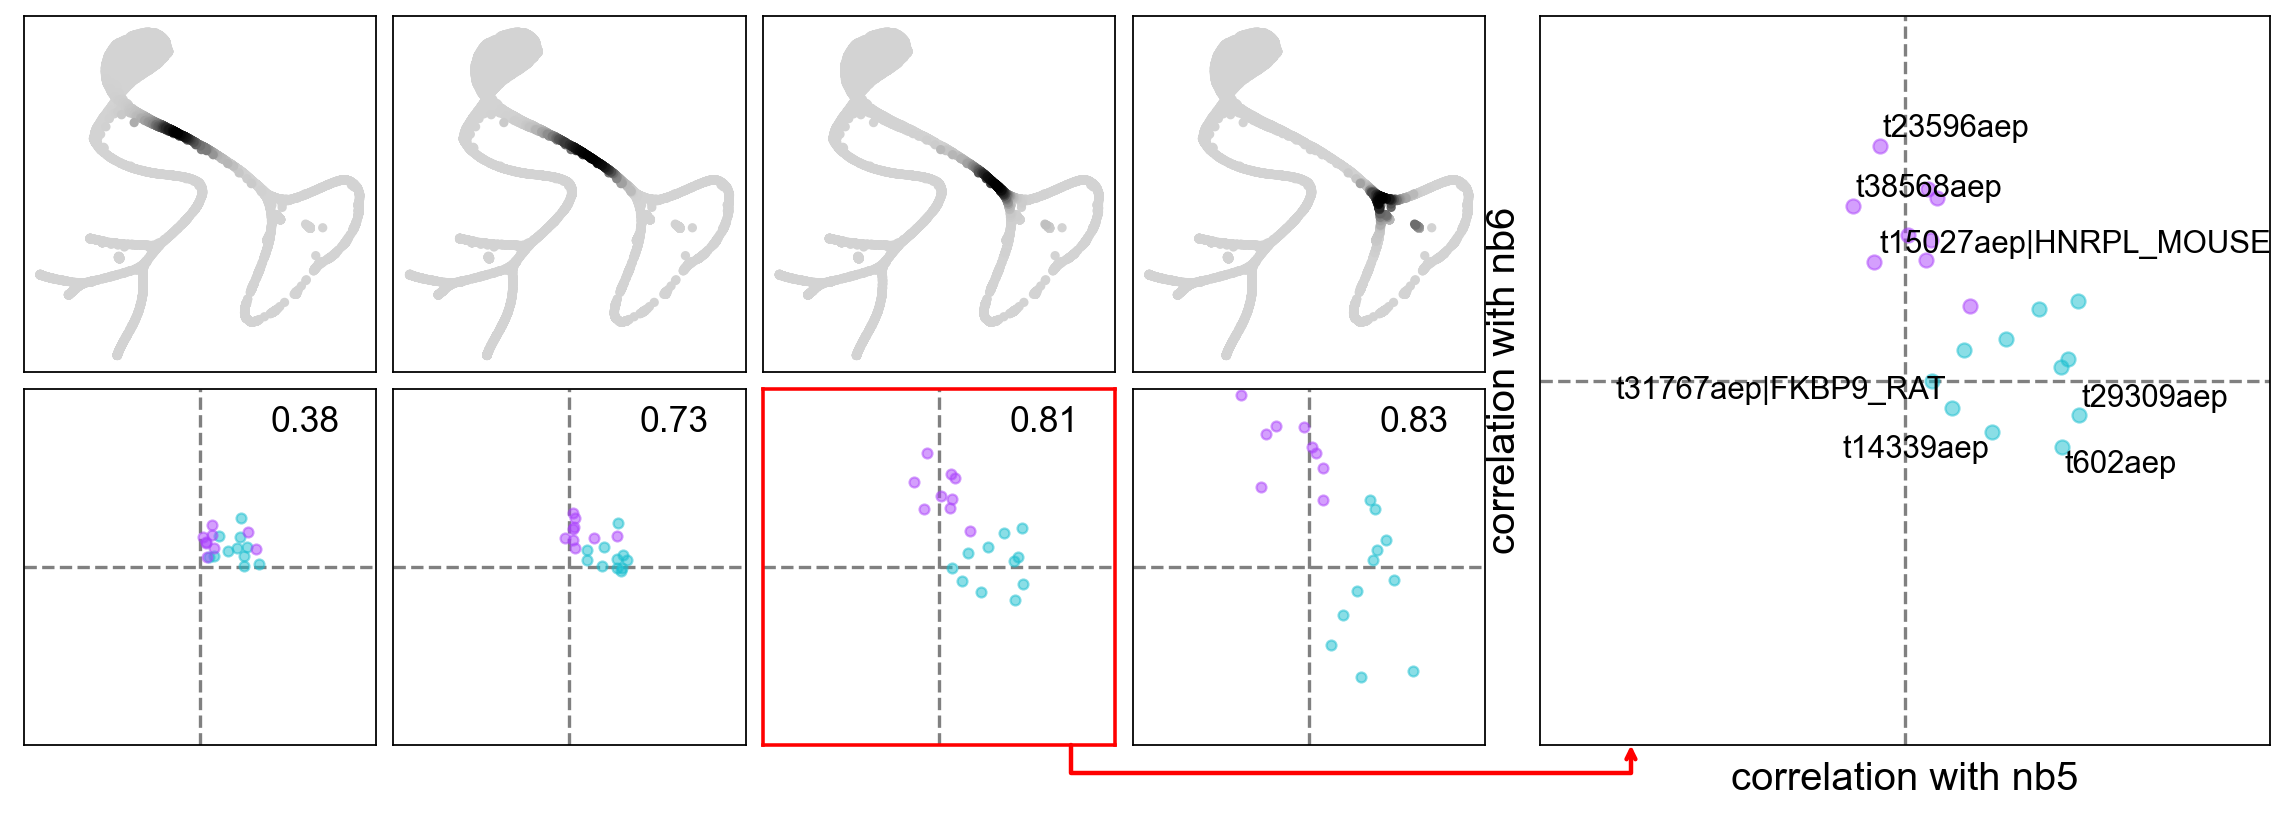

In [27]:
sc.set_figure_params()
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=range(13,17),focus=2)

In [ ]:
scf.tl.synchro_path(adata,root,miles,w=100,step=15,n_jobs=80,n_map=100,knots=5)

computing local correlations
    multi mapping: 100%|██████████| 100/100 [01:01<00:00,  1.62it/s]

In [ ]:
scf.pl.synchro_path(adata,root,miles,knots=20)

<AxesSubplot:title={'center':'inter-correlation\nnb5<>nb6'}, xlabel='FA1', ylabel='FA2'>

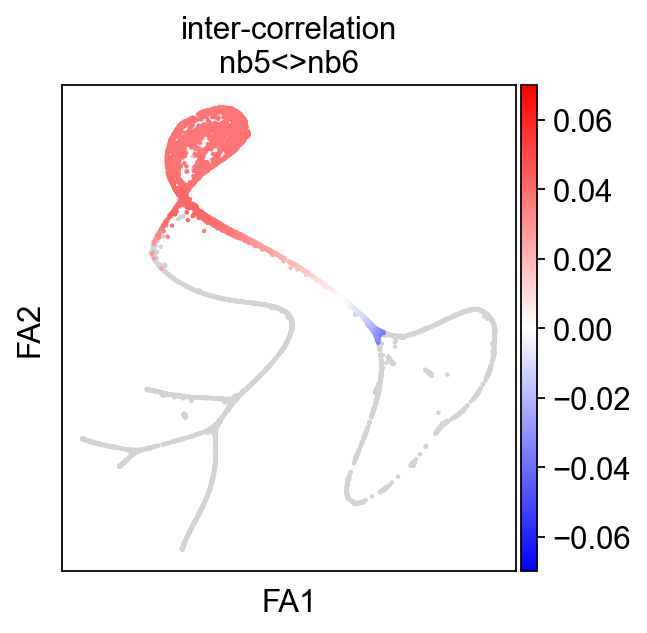

In [30]:
sc.pl.draw_graph(adata,color=f"inter_cor {root}->{miles[0]}<>{miles[1]}",cmap="bwr",
                 title=f"inter-correlation\n{miles[0]}<>{miles[1]}",vmax=0.07,vmin=-0.07,show=False)

In [31]:
adata.write("adata_final.h5ad")